# Cheminformatics in Python: Predicting Solubility of Molecules


                       Solubility, the phenomenon of dissolution of solute in solvent to give a homogenous system, is one of the important parameters to achieve desired concentration of drug in systemic circulation for desired pharmacological   response. Low aqueous solubility is the major problem encountered with formulation development of new chemical entities as well as for the generic development. More than 40% NCEs (new chemical entities) developed in pharmaceutical industry are practically insoluble in water.

                    Solubility is still a major challenge for molecule optimization. Any drug to be absorbed must be present in the form of solution at the site of absorption. The enhancement of the solubility of poorly soluble drugs involves a lot of trials and errors, which calls for AI's guidance.                   
                         

                     Estimated Aqueous Solubility (delaney) is a standard regression dataset containing structures and water    solubility  data for 1128 compounds.The dataset is widely used to validate machine learning models on estimating        solubility directly from molecular structures (as encoded in SMILES strings).
             

#### Reference:  
Delaney, John S. "ESOL: estimating aqueous solubility directly from molecular structure." Journal of chemical information and computer sciences 44.3 (2004): 1000-1005.  

## Import Libraries :

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors

## Load data :

In [2]:
solubility = pd.read_csv('delaney-processed.csv')

In [3]:
solubility.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


## Examining the SMILES data :

Chemical structures are encoded by a string of text known as **SMILES** which is an acronym for **Simplified Molecular-Input Line-Entry System**.

In [4]:
solubility.smiles

0       OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1                                  Cc1occc1C(=O)Nc2ccccc2
2                                    CC(C)=CCCC(C)=CC(=O)
3                      c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4                                                 c1ccsc1
                              ...                        
1123                                     FC(F)(F)C(Cl)Br 
1124                            CNC(=O)ON=C(SC)C(=O)N(C)C
1125                                    CCSCCSP(=S)(OC)OC
1126                                              CCC(C)C
1127                COP(=O)(OC)OC(=CCl)c1cc(Cl)c(Cl)cc1Cl
Name: smiles, Length: 1128, dtype: object

In [5]:
solubility.smiles[0]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

In [6]:
m = Chem.MolFromSmiles(solubility.smiles[0])

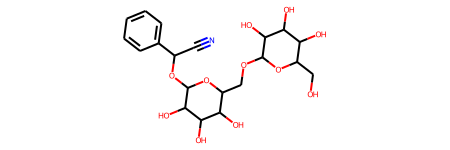

In [7]:
m

In [8]:
m.GetNumAtoms()

32

## Calculate molecular descriptors :

To predict **LogS** (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:

1. cLogP (Octanol-water partition coefficient)
2. MW (Molecular weight)
3. RB (Number of rotatable bonds)
4. AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)

    Molecular weight and number of rotatabe bonds are readily available from the CSV file provided. LogP can be readily calculated using rdkit. As for the AP descriptor, we will calculate this by manually computing the ratio of the number of aromatic atoms to the total number of heavy atoms which rdkit can compute.

### Calculating logP :




In [9]:
from rdkit.Chem import PandasTools
import warnings
warnings.filterwarnings('ignore')

In [10]:
PandasTools.AddMoleculeColumnToFrame(solubility, smilesCol='smiles',molCol='ROMol',)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,ROMol,LogP
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,,-3.10802
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,,2.84032
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),,2.87800
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,,6.29940
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,,1.74810

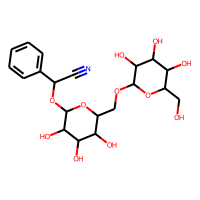
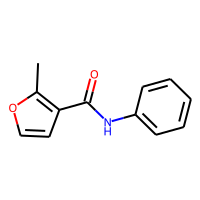
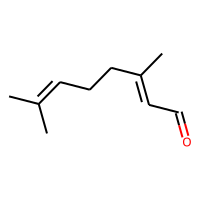
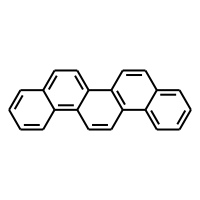
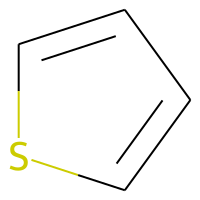

In [57]:
solubility.head(5)

In [12]:
desc_MolLogP = [Descriptors.MolLogP(molecule) for molecule in solubility.ROMol]


In [13]:
solubility['LogP'] = desc_MolLogP

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,ROMol,LogP
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,,-3.10802
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,,2.84032
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),,2.87800
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,,6.29940
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,,1.74810

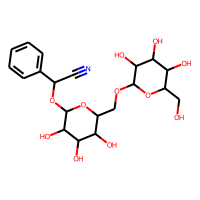
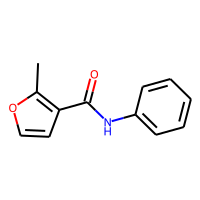
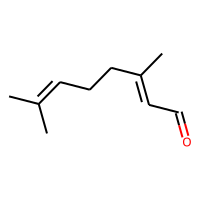
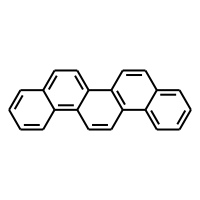
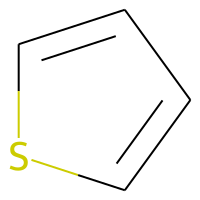

In [14]:
solubility.head()

### Calculating the aromatic proportion :


In [15]:
mol_list= []
for element in solubility.smiles:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [16]:
len(mol_list)

1128

In [17]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [18]:
desc_aromatic_proportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]

In [19]:
columnname = ['AromaticProportion']

In [20]:
df_aa = pd.DataFrame(desc_aromatic_proportion,columns=columnname)

In [21]:
df_aa

,AromaticProportion
0,0.187500
1,0.733333
2,0.000000
3,1.000000
4,1.000000
...,...
1123,0.000000
1124,0.000000
1125,0.000000
1126,0.000000


In [22]:
df_sol = pd.concat([solubility,df_aa], axis=1)

## Final Data :

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,ROMol,LogP,AromaticProportion
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,,-3.10802,0.187500
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,,2.84032,0.733333
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),,2.87800,0.000000
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,,6.29940,1.000000
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,,1.74810,1.000000

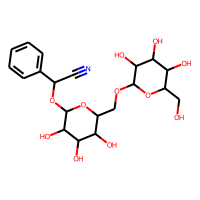
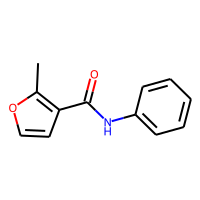
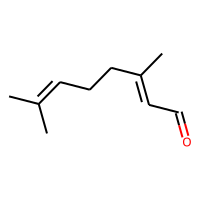
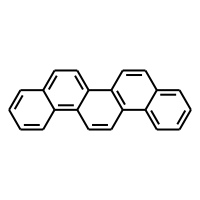
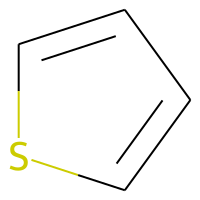

In [23]:
df_sol.head()

## Linear Regression Model :

In [24]:
x = df_sol.drop(['Compound ID','smiles','measured log solubility in mols per litre','ESOL predicted log solubility in mols per litre','ROMol'],axis=1)
x

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,LogP,AromaticProportion
0,1,457.432,7,3,7,202.32,-3.10802,0.187500
1,1,201.225,1,2,2,42.24,2.84032,0.733333
2,1,152.237,0,0,4,17.07,2.87800,0.000000
3,2,278.354,0,5,0,0.00,6.29940,1.000000
4,2,84.143,0,1,0,0.00,1.74810,1.000000
...,...,...,...,...,...,...,...,...
1123,1,197.381,0,0,0,0.00,2.50850,0.000000
1124,1,219.266,1,0,1,71.00,0.10710,0.000000
1125,1,246.359,0,0,7,18.46,2.99000,0.000000
1126,1,72.151,0,0,1,0.00,2.05240,0.000000


In [25]:
y = df_sol.iloc[:,8]
y

0      -0.770
1      -3.300
2      -2.060
3      -7.870
4      -1.330
        ...  
1123   -1.710
1124    0.106
1125   -3.091
1126   -3.180
1127   -4.522
Name: measured log solubility in mols per litre, Length: 1128, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state = 910)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linreg_model = LinearRegression()
linreg_model.fit(x_train, y_train)

LinearRegression()

In [29]:
print('cofficients:',linreg_model.coef_)
print('Intercept:', linreg_model.intercept_)

cofficients: [-0.51921652 -0.00162641 -0.14882185 -0.18696242 -0.03085297 -0.00616122
 -0.9347543  -0.09281221]
Intercept: 0.7873097352630856


In [30]:
y_pred_train = linreg_model.predict(x_train)

In [31]:
y_pred_test = linreg_model.predict(x_test)

In [32]:
from sklearn import metrics

In [33]:
print('Mean squared error : ' , np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

Mean squared error :  0.9782067067168796


In [34]:
print('Mean squared error : ' , np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean squared error :  0.9802485860980829


In [35]:
print('R2_score : ' , metrics.r2_score(y_train,y_pred_train))

R2_score :  0.7828668231989405


In [36]:
print('R2_score : ' , metrics.r2_score(y_test,y_pred_test))

R2_score :  0.777999123462787


## Save the model :

In [41]:
import pickle

In [42]:
filename = 'finalized_model.sav'
pickle.dump(linreg_model, open(filename, 'wb'))

In [43]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.777999123462787


## Test Data :

In [44]:
test_data = pd.read_csv('test.csv')

In [45]:
test_data.head()

,smiles
0,Nc1ccc(Br)cc1C(=O)O
1,Oc1ccc(I)cc1
2,O=C(O)c1cc(Br)c(O)cc1O
3,C=CCc1ccccc1OCC(O)CNC(C)C
4,NC12CC3CC(CC(C3)C1)C2


In [46]:
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:  
        
        desc_MolWt = Descriptors.MolWt(mol) 
        desc_Num_Hbonddonors = Descriptors.NumHDonors(mol)
        desc_num_rings = Descriptors.RingCount(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
        desc_PSA = Descriptors.TPSA(mol)       
        desc_MolLogP = Descriptors.MolLogP(mol) 

           
        row = np.array([desc_MolWt,desc_Num_Hbonddonors,desc_num_rings,desc_NumRotatableBonds,desc_PSA,desc_MolLogP,])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1         
    columnNames=["MolWt","Number of H-Bond Donors","Number of Rings","NumRotatableBonds","Polar Surface Area","MolLogP"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [47]:
df_test = generate(test_data.smiles)
df_test

,MolWt,Number of H-Bond Donors,Number of Rings,NumRotatableBonds,Polar Surface Area,MolLogP
0,216.034,2.0,1.0,1.0,63.32,1.72950
1,220.009,1.0,1.0,0.0,20.23,1.99680
2,233.017,3.0,1.0,1.0,77.76,1.55850
3,249.354,2.0,1.0,8.0,41.49,2.15280
4,151.253,1.0,4.0,0.0,26.02,1.91390
...,...,...,...,...,...,...
73,257.289,1.0,2.0,4.0,59.30,2.19162
74,290.323,2.0,2.0,5.0,105.51,1.25760
75,294.442,0.0,3.0,4.0,6.48,4.12100
76,160.220,2.0,2.0,2.0,41.81,1.66910


In [48]:
test_mol_list= []
for element in test_data.smiles:
  mol = Chem.MolFromSmiles(element)
  test_mol_list.append(mol)

In [49]:
len(test_mol_list)

78

In [50]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in test_mol_list]


In [51]:
desc_aromatic_proportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in test_mol_list]

In [52]:
columnname = ['AromaticProportion']
df_test_aa = pd.DataFrame(desc_aromatic_proportion, columns = columnname)

In [53]:
df_test_sol = pd.concat([df_test,df_test_aa],axis=1)
df_test_sol

,MolWt,Number of H-Bond Donors,Number of Rings,NumRotatableBonds,Polar Surface Area,MolLogP,AromaticProportion
0,216.034,2.0,1.0,1.0,63.32,1.72950,0.545455
1,220.009,1.0,1.0,0.0,20.23,1.99680,0.750000
2,233.017,3.0,1.0,1.0,77.76,1.55850,0.500000
3,249.354,2.0,1.0,8.0,41.49,2.15280,0.333333
4,151.253,1.0,4.0,0.0,26.02,1.91390,0.000000
...,...,...,...,...,...,...,...
73,257.289,1.0,2.0,4.0,59.30,2.19162,0.578947
74,290.323,2.0,2.0,5.0,105.51,1.25760,0.571429
75,294.442,0.0,3.0,4.0,6.48,4.12100,0.545455
76,160.220,2.0,2.0,2.0,41.81,1.66910,0.750000


In [54]:
print('cofficients:',linreg_model.coef_)
print('Intercept:', linreg_model.intercept_)

cofficients: [-0.51921652 -0.00162641 -0.14882185 -0.18696242 -0.03085297 -0.00616122
 -0.9347543  -0.09281221]
Intercept: 0.7873097352630856


In [55]:
test_LogS_list = []
for i, row in df_test_sol.iterrows():
    test_logS = (row['MolWt']*-0.00162641)+(row['Number of H-Bond Donors']*-0.14882185)+(row['Number of Rings']*-0.18696242)+(row['NumRotatableBonds']*-0.03085297)+(row['Polar Surface Area']*-0.00616122)+(row['MolLogP']* -0.9347543)+(row['AromaticProportion']*-0.09281221)+0.7873097352630856
    test_LogS_list.append(test_logS)
    

In [56]:
df_test_sol['LogS'] = test_LogS_list
df_test_sol

,MolWt,Number of H-Bond Donors,Number of Rings,NumRotatableBonds,Polar Surface Area,MolLogP,AromaticProportion,LogS
0,216.034,2.0,1.0,1.0,63.32,1.72950,0.545455,-2.136920
1,220.009,1.0,1.0,0.0,20.23,1.99680,0.750000,-1.967067
2,233.017,3.0,1.0,1.0,77.76,1.55850,0.500000,-2.238270
3,249.354,2.0,1.0,8.0,41.49,2.15280,0.333333,-2.648577
4,151.253,1.0,4.0,0.0,26.02,1.91390,0.000000,-2.304702
...,...,...,...,...,...,...,...,...
73,257.289,1.0,2.0,4.0,59.30,2.19162,0.578947,-2.745026
74,290.323,2.0,2.0,5.0,105.51,1.25760,0.571429,-2.389361
75,294.442,0.0,3.0,4.0,6.48,4.12100,0.545455,-4.318545
76,160.220,2.0,2.0,2.0,41.81,1.66910,0.750000,-2.093956
